In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tkinter import filedialog
from numpy import genfromtxt
from collections import Counter
import plotly.express as px

In [3]:
df= pd.read_csv("C:/Users/lucab/Dropbox/PC/Desktop/morrofocca/Uni/master/stellar astrophysics (27)/progetto/master_flag_dr2edr3_joseph_210412.csv")
nc= pd.read_csv("C:/Users/lucab/Dropbox/PC/Desktop/morrofocca/Uni/master/stellar astrophysics (27)/progetto/nice_distribution.csv")


C:\Users\lucab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (35,42,43,52,53,54,55,56,210,290,296,320,329,335,372,400,436,439,459,460,461,462,463,466,475,512,513,514,515,516,517,521,523,537,538,539,555,556,557) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
a=df['feh_final2_2_1'].dropna()
print (len(a[a!=-99])) # numero di stelle usate nel campione

9358


In [171]:
pd.Series(df.cluster_single).value_counts().tolist # mi da la lista del numero di stelle per ogni ammasso

<bound method IndexOpsMixin.tolist of Sculptor         462
Fornax           315
Draco            215
NGC_5272         196
Carina Nebula    195
NGC_6266         129
Sextans          114
Ursa Minor       106
IC_4499           83
NGC_3201          78
NGC_5904          59
NGC_6934          49
NGC_6121          41
NGC_5024          41
NGC_7078          38
NGC_6402          36
NGC_2419          32
NGC_4590          32
NGC_6229          30
NGC_6981          29
NGC_6362          27
NGC_7006          21
NGC_5466          20
NGC_5139          20
NGC_6171          15
NGC_1851          15
Carina            14
NGC_362           13
NGC_6341          11
NGC_6864          11
Bootes I          10
NGC_6333           9
NGC_5053           9
NGC_5986           7
NGC_6205           7
NGC_6626           7
NGC_6809           7
NGC_5286           7
NGC_6656           6
NGC_6093           5
NGC_4833           5
NGC_6235           4
NGC_5634           4
NGC_1904           4
NGC_2808           4
NGC_5897         

In [192]:
pd.set_option('max_column',None)
print(df.columns.tolist())
#len(df[df['feh_final2_2_1']!=-99].cluster_single) #.value_counts()

['myRRLyrOid', 'GaiaOid', 'gaiaVariable', 'angularDistance', 'GaiaAstrometricParams', 'GaiaSourceId_1a_1_1', 'GaiaRA_1', 'GaiaDEC_1', 'GaiaRAerror', 'GaiaDECerror', 'Gaial_1', 'Gaiab_1', 'GaiaG', 'GaiaBP', 'GaiaRP', 'Gaiapmra', 'Gaiapmdec', 'GaiapmraError', 'GaiapmdecError', 'Gaiapmtotal', 'GaiaParallax', 'GaiaParallaxError', 'GaiaParallaxOverError', 'Sdssdr9SourceId', 'Sdssdr9u', 'Sdssdr9uerror', 'Sdssdr9g', 'Sdssdr9gerror', 'Sdssdr9r', 'Sdssdr9rerror', 'Sdssdr9i', 'Sdssdr9ierror', 'Sdssdr9z', 'Sdssdr9zerror', 'Sdssdr9cleanFlag', 'TMassSourceId', 'TMassJ', 'TMassJerror', 'TMassH', 'TMassHerror', 'TMassKs', 'TMassKserror', 'TMassphQual', 'allWISESourceId', 'allWISEw1', 'allWISEw1error', 'allWISEw2', 'allWISEw2error', 'allWISEw3', 'allWISEw3error', 'allWISEw4', 'allWISEw4error', 'allWISEccFlags', 'allWISEvarFlag', 'allWISEphQual', 'myRRLyrSourceId', 'source', 'Vmean', 'asasVmean', 'asasVmeanError', 'asasVmax', 'solution_id_2', 'designation_1', 'source_id_2', 'random_index_1', 'ref_epoch

<IPython.core.display.Javascript object>


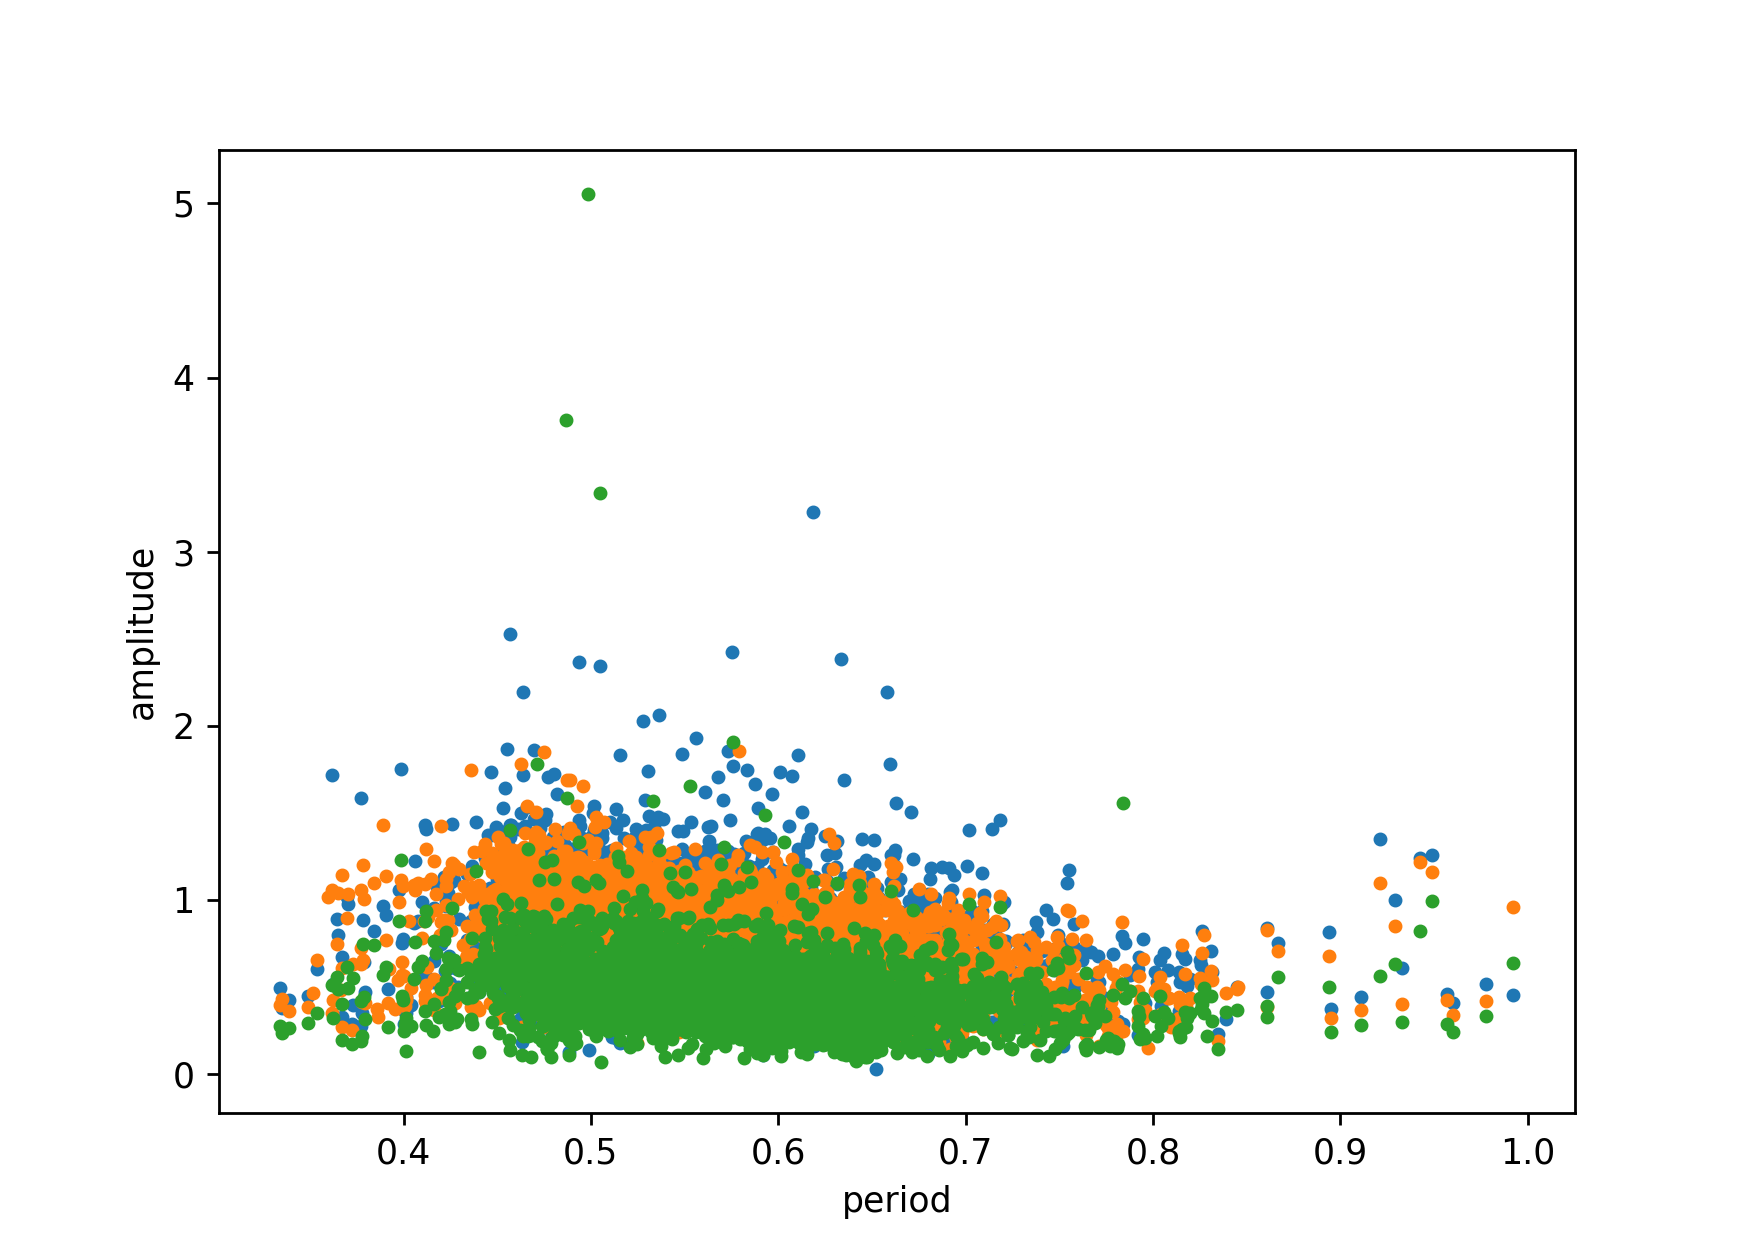

[]

In [120]:
'''metallicità spettrosc.'''

df1=df
met=df[df.feh_final2_2_1!=-99].feh_final2_2_1# mi trova il valore del ferro per ogni ammasso
a_rosso= df[df.feh_final2_2_1!=-99].peak_to_peak_rp
a_blu= df[df.feh_final2_2_1!=-99].peak_to_peak_bp
a_gaia= df[df.feh_final2_2_1!=-99].peak_to_peak_g
rosso= df[df.feh_final2_2_1!=-99].GaiaRP
blu= df[df.feh_final2_2_1!=-99].GaiaBP
gaia= df[df.feh_final2_2_1!=-99].GaiaG
pf= df[df.feh_final2_2_1!=-99].pf
plt.figure(figsize=[7,5])
#plt.hist(met,100)
plt.plot(pf,a_blu,'.')
plt.plot(pf,a_gaia,'.')
plt.plot(pf,a_rosso,'.')

plt.xlabel('period')
plt.ylabel('amplitude')
plt.savefig('C:/Users/lucab/Dropbox/PC/Desktop/morrofocca/Uni/master/stellar astrophysics/progetto/hist/stelle_campione_bin100.jpg')
plt.plot()

#per cross mecciare forte i nomi degli ammassi nel catalogo gaia con quelli del catalogo NN faccio nn_dataframe['cluster_single']=Gaia_df['cluster_signle']


In [196]:
'''
# metodo alternativo per trovare gli incidi degli ammassi (l'altro funziona meglio)

condition = df["cluster_single"] == "Fornax" 
csi = df.index[condition].tolist() # sono gli indici dell'ammasso selezionato, cluster stars index

'''

315

<IPython.core.display.Javascript object>


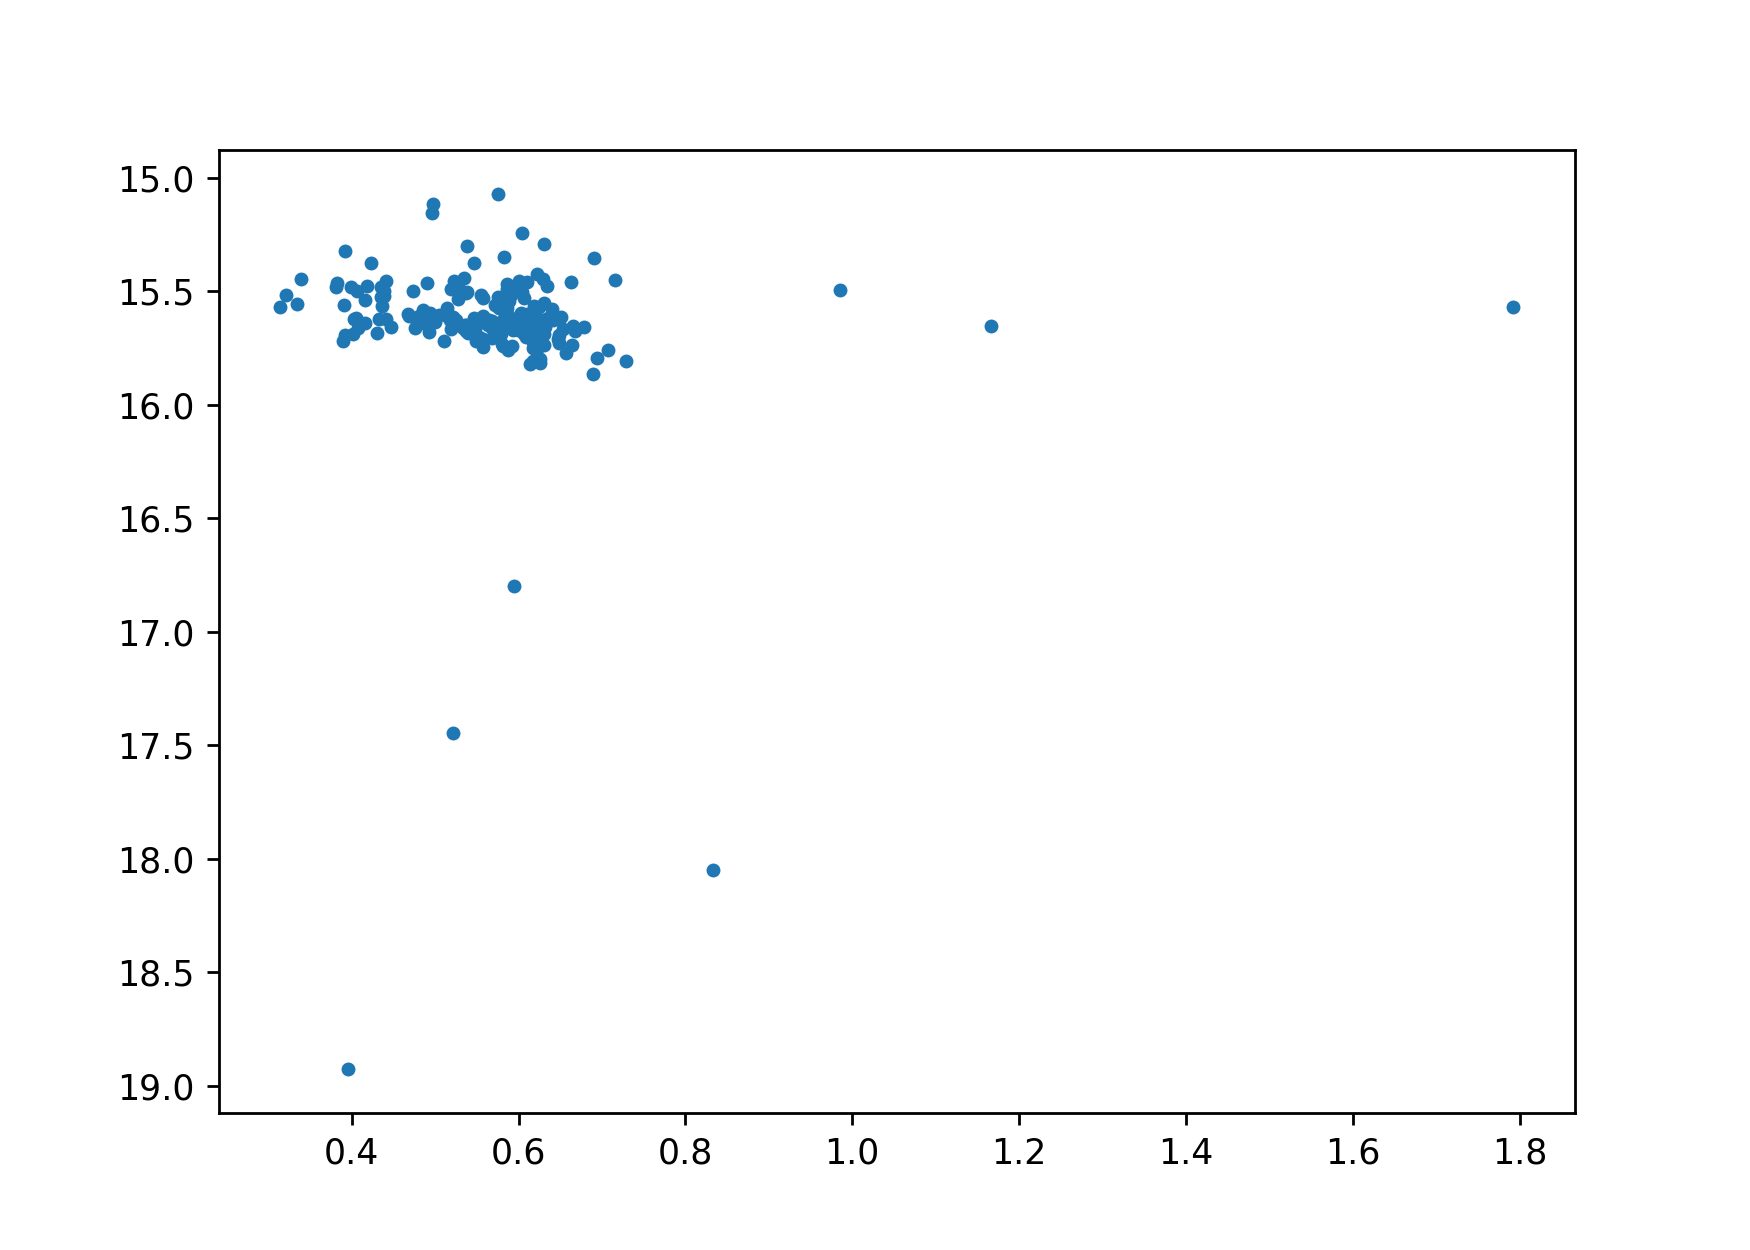

In [118]:
''' NON NECESSARIO'''

'''CMD delle RRly'''

lista= df.cluster_single=='NGC_5272'
#print ((df[lista].alpha_elements))
g=df[lista].GaiaG
b=df[lista].GaiaBP
r=df[lista].GaiaRP
color=b-r

plt.figure(figsize=[7,5])

plt.gca().invert_yaxis()
plt.plot(b-r,g,'.')
#plt.plot(b-g,g,'*')
#plt.plot()


In [68]:
#df['cluster_single'].value_counts()

'''seleziono le stelle con flag corretto, quelle con flag = 0 non vanno bene, nono che non vanno bene'''

df1=df[df['flagfe_final_2']!=0]
#nc['cluster_single'].value_counts()
#print (df)
df[df.feh_final2_2_1!=-99].cluster_single.value_counts()

Sextans     20
NGC_5272     8
NGC_5024     6
NGC_7078     3
NGC_5904     2
NGC_5053     2
NGC_6121     1
NGC_6341     1
Bootes I     1
NGC_5466     1
Name: cluster_single, dtype: int64

In [80]:
clusters=df.cluster_single.dropna().unique().tolist()

ammasso=[]
media=[]
stand=[]

# seleziono gli ammassi con più di 35 stelle

for i in clusters:
    if len(nc[nc.cluster_single==i].met.tolist())>34:
        media.append(np.mean(nc[nc.cluster_single==i].met))
        stand.append(np.std(nc[nc.cluster_single==i].met))
        ammasso.append(i)
        print (i,'[Fe/H] =',np.mean(nc[nc.cluster_single==i].met),'+/-',np.std(nc[nc.cluster_single==i].met),'|| #_stars =',len(nc[nc.cluster_single==i].met.tolist()))
'''

for name in ammasso:
    mean=np.mean(nc[nc.cluster_single==name].met)
    std=np.std(nc[nc.cluster_single==name].met)
    print (name,'=',str(mean)[:6],'±',str(std)[:4])
    
    plt.figure(figsize=[8,4])
    plt.hist(nc[nc.cluster_single==name].met,10,label=(str(name)+', [Fe/H] ='+str(mean)[:5]+'±'+str(std)[:4]))
    plt.legend()
    plt.xlabel('[Fe/H]')
    plt.ylabel('Number of stars')
    plt.savefig('C:/Users/lucab/Dropbox/PC/Desktop/morrofocca/Uni/master/stellar astrophysics/progetto/hist/'+str(name)+'_1.jpg')
    #plt.plot() '''

Draco [Fe/H] = -1.6775960619047612 +/- 0.2538131141475573 || #_stars = 42
NGC_5272 [Fe/H] = -1.4449745611111104 +/- 0.14516168935024157 || #_stars = 126
Ursa Minor [Fe/H] = -1.7183333438888893 +/- 0.3946217274374179 || #_stars = 36
NGC_6934 [Fe/H] = -1.4135215049999996 +/- 0.09664637540890489 || #_stars = 40
Sculptor [Fe/H] = -1.6330694847736613 +/- 0.2078523551729301 || #_stars = 243
NGC_3201 [Fe/H] = -1.3972390145161293 +/- 0.07884784528972169 || #_stars = 62
IC_4499 [Fe/H] = -1.5176461425925925 +/- 0.13995150080256585 || #_stars = 54
NGC_6266 [Fe/H] = -1.2900448519540229 +/- 0.16931709452135726 || #_stars = 87
NGC_6121 [Fe/H] = -1.2879282994285712 +/- 0.20555874894609327 || #_stars = 35


"\n\nfor name in ammasso:\n    mean=np.mean(nc[nc.cluster_single==name].met)\n    std=np.std(nc[nc.cluster_single==name].met)\n    print (name,'=',str(mean)[:6],'±',str(std)[:4])\n    \n    plt.figure(figsize=[8,4])\n    plt.hist(nc[nc.cluster_single==name].met,10,label=(str(name)+', [Fe/H] ='+str(mean)[:5]+'±'+str(std)[:4]))\n    plt.legend()\n    plt.xlabel('[Fe/H]')\n    plt.ylabel('Number of stars')\n    plt.savefig('C:/Users/lucab/Dropbox/PC/Desktop/morrofocca/Uni/master/stellar astrophysics/progetto/hist/'+str(name)+'_1.jpg')\n    #plt.plot() "

<IPython.core.display.Javascript object>


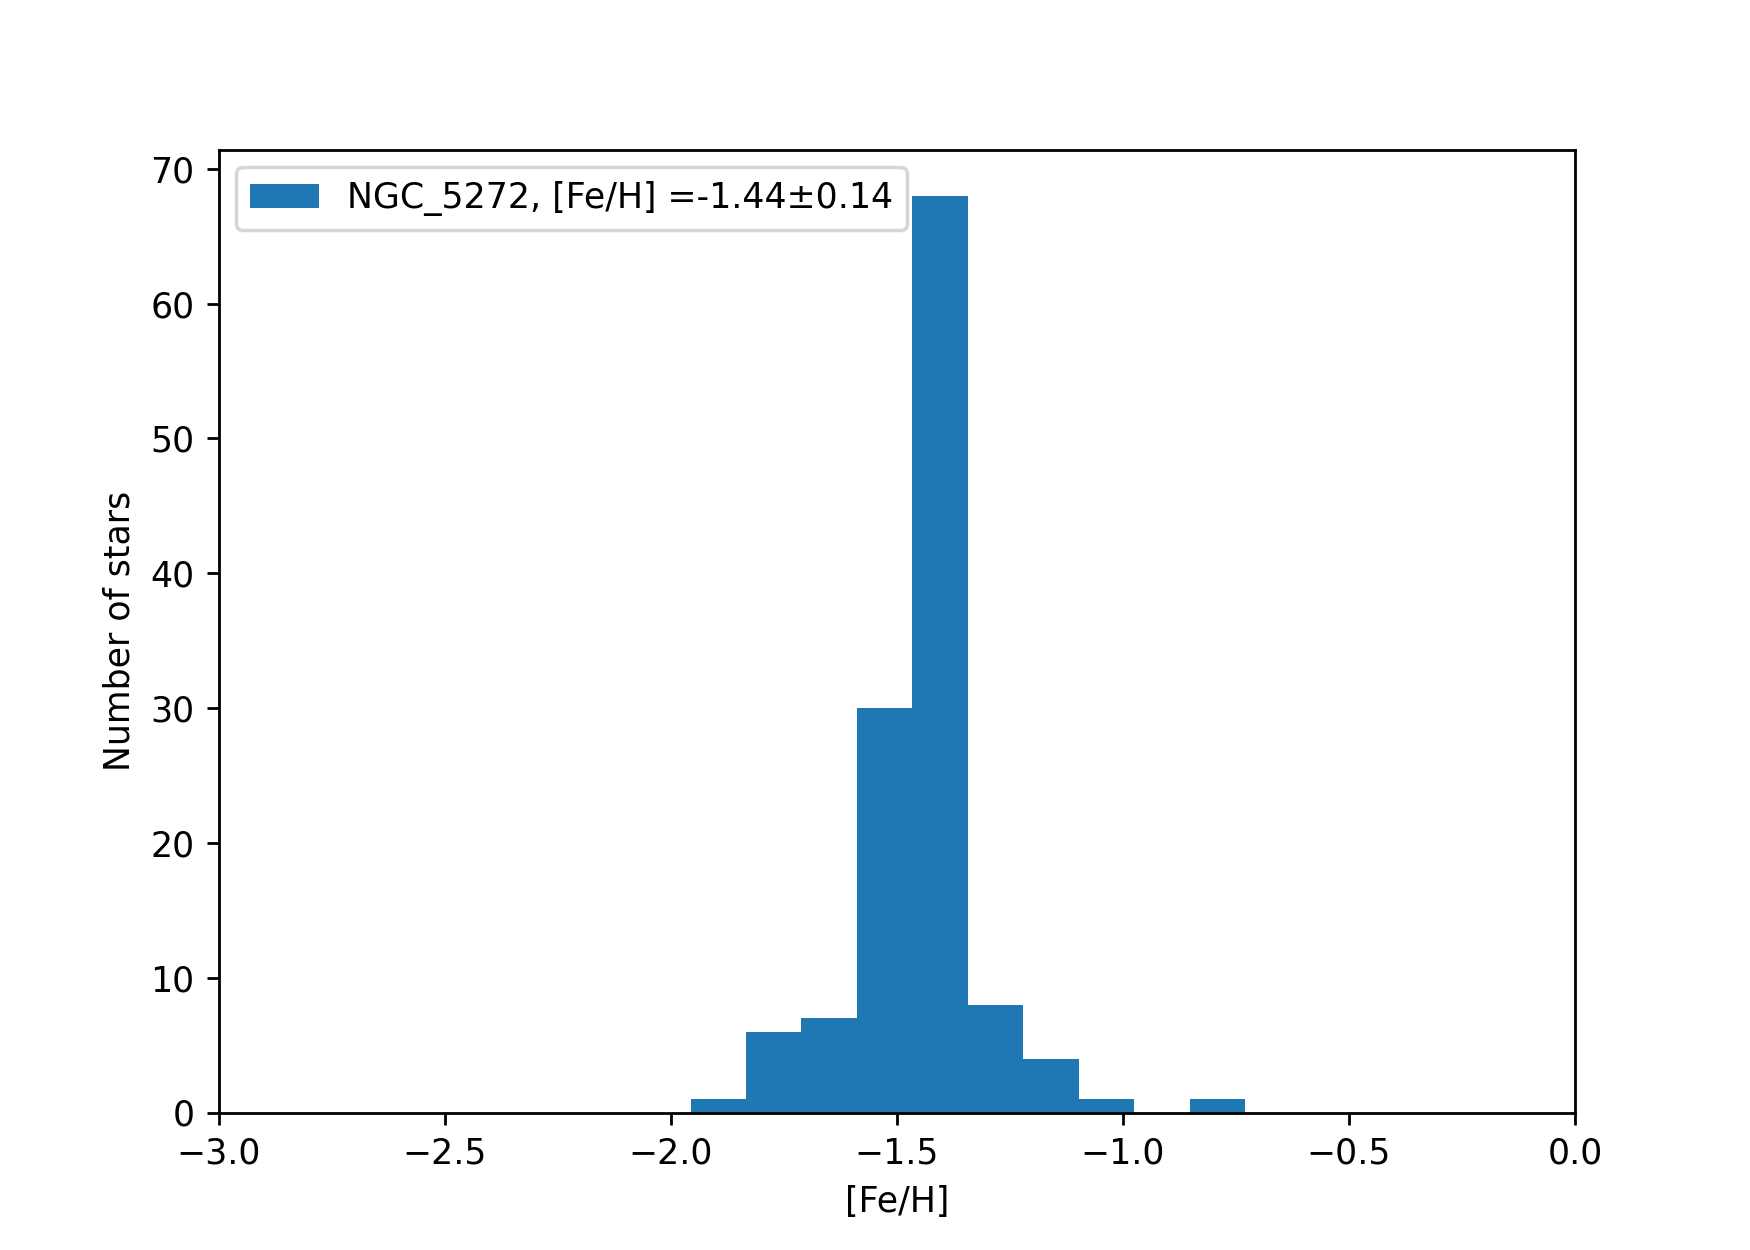

126.0


In [119]:
name='NGC_5272'
metallooo=nc[nc.cluster_single==name].met.tolist()
mean=np.mean(nc[nc.cluster_single==name].met)
std=np.std(nc[nc.cluster_single==name].met)
plt.figure(figsize=[7,5])
a=plt.hist(metallooo,label=(str(name)+', [Fe/H] ='+str(mean)[:5]+'±'+str(std)[:4]))
plt.legend()
plt.xlabel('[Fe/H]')
plt.ylabel('Number of stars')
plt.xlim([-3,0])
#plt.plot()
#plt.savefig('C:/Users/lucab/Dropbox/PC/Desktop/morrofocca/Uni/master/stellar astrophysics/progetto/hist/'+str(name)+'_bin10.jpg')

#print (len(nc[nc.cluster_single==name].met.tolist()))
print(sum(a[0]))

[15.1295726  10.04596851 22.96537682  6.83727662 12.72771043  5.64311793
  9.22161609 13.12489983 15.96041868]


<IPython.core.display.Javascript object>


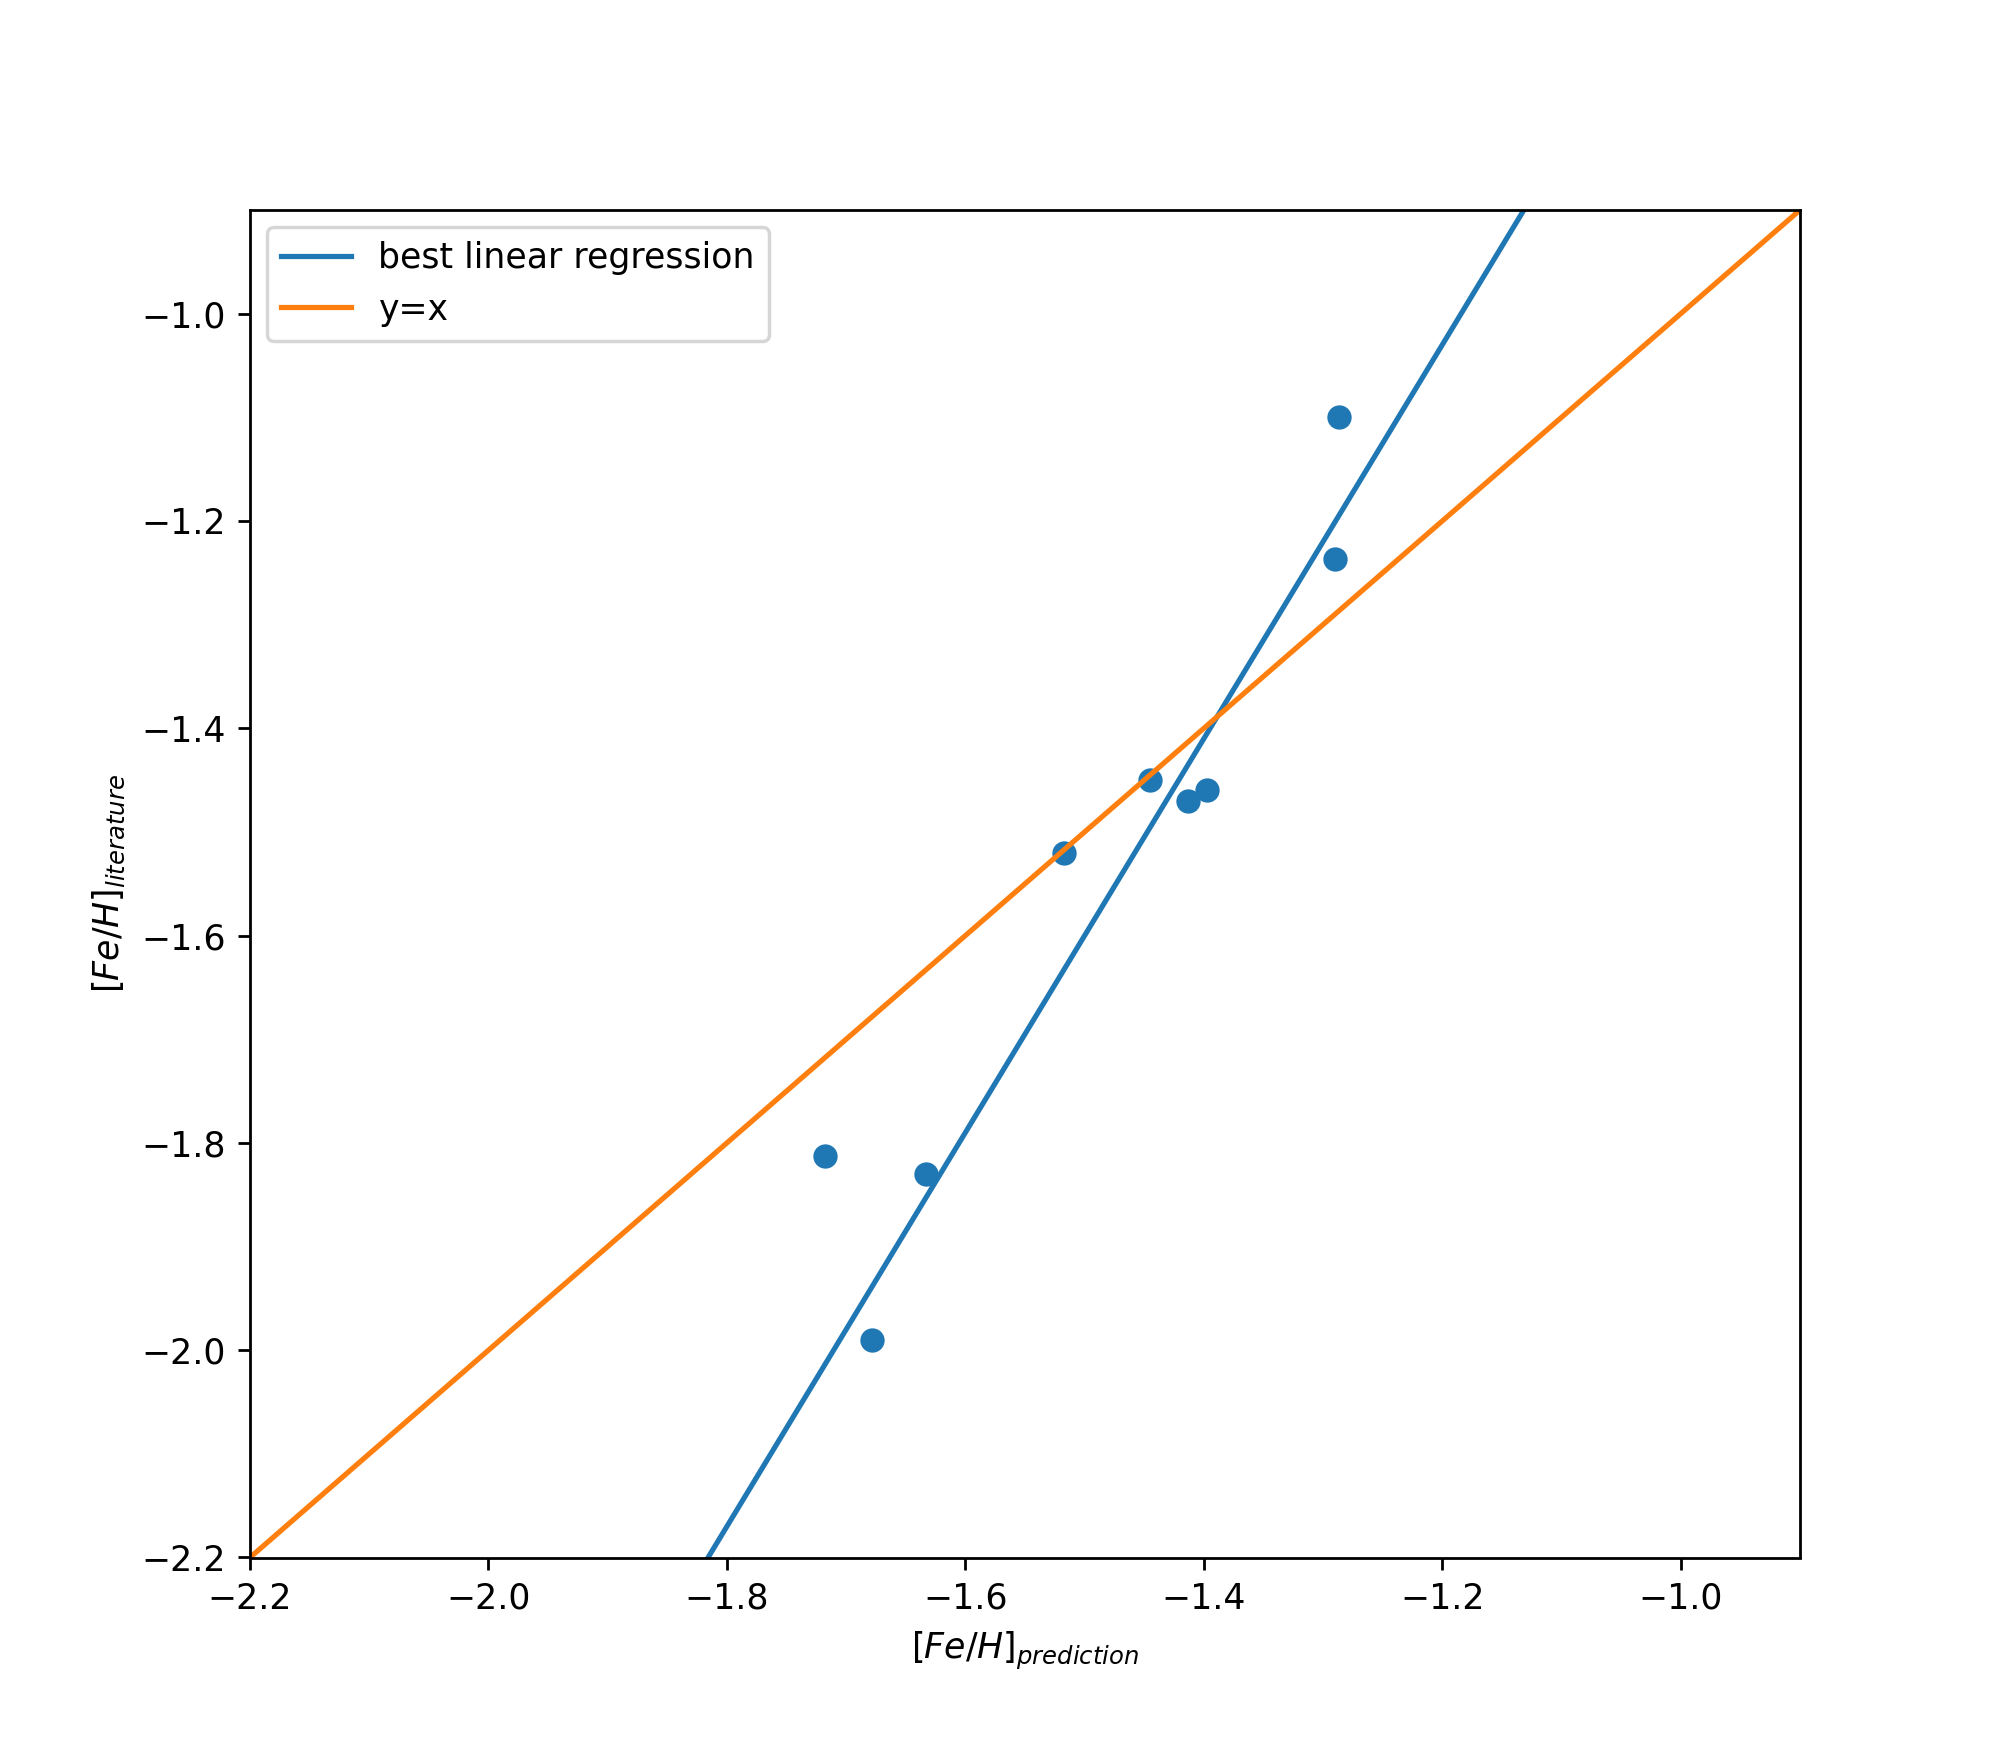

[]

In [109]:
'''
#tutti i valori, in quelli sotto ho mediato gli ultimi 4 valori della stessa galassia

x  =np.array( [-1.678, -1.445, -1.718, -1.718, -1.718, -1.413, -1.633, -1.397, -1.517, -1.517, -1.290, -1.290, -1.290, -1.290, -1.290, -1.287])
xe =np.array( [0.254 , 0.145 , 0.395 , 0.395 , 0.395 , 0.097 , 0.208 , 0.079 , 0.140 , 0.140 , 0.169 , 0.169 , 0.169 , 0.169 , 0.169 , 0.206 ])
y  =np.array( [-1.99 , -1.45 , -2.13 , -1.8  , -2.03 , -1.47 , -1.83 , -1.46 , -1.64 , -1.52 , -1.3  , -1.23 , -1.15 , -1.28 , -1.18 , -1.1  ])
ye =np.array( [  0.  ,   0.  ,  0.02 ,  0.5  ,   0.  ,   0.  ,  0.03 ,   0.  ,   0.  ,  0.12 ,   0.  ,  0.09 ,  0.02 ,  0.15 ,  0.07 , 0.    ])

m=[-1.3  , -1.23 , -1.15 , -1.28 , -1.18 ]
pesi= [0, 0.09 ,  0.02 ,  0.15 ,  0.07 ]
np.average(np.array(m),weights=np.array(pesi)) = -1.2372727272727273
np.std(m)+np.std(pesi) = 0.11020269149309415
'''

x  =np.array( [-1.678, -1.445, -1.718, -1.413, -1.633, -1.397, -1.517, -1.290, -1.287])
xe =np.array( [0.254 , 0.145 , 0.395 , 0.097 , 0.208 , 0.079 , 0.140 , 0.169 , 0.206 ])
y  =np.array( [-1.99 , -1.45 , -1.813, -1.47 , -1.83 , -1.46 , -1.52 , -1.237, -1.1  ])
ye =np.array( [  0.  ,   0.  , 0.379 ,   0.  ,  0.03 ,   0.  ,  0.12 ,  0.11 , 0.    ])


print (np.sqrt(((np.array(stand)/np.array(media)*100)**2))) # lista degli errori percentuali
       
retta=np.linspace(-3,0,100)

fig = plt.figure(figsize=[8,7])
plt.scatter(x,y)
#plt.errorbar(x,y, xerr=xe , yerr=ye, fmt='o' ,linestyle="None")
plt.plot(retta,1.9*retta+1.25, label='best linear regression')
plt.plot(retta,retta,label='y=x')
plt.xlabel(r'$[Fe/H]_{prediction}$')
plt.ylabel(r'$[Fe/H]_{literature}$')
plt.legend()
plt.xlim([-2.2,-0.9])
plt.ylim([-2.2,-0.9])
plt.savefig('C:/Users/lucab/Dropbox/PC/Desktop/morrofocca/Uni/master/stellar astrophysics/progetto/hist/confronto_dati_mediati_regr.jpg')
plt.plot()


<IPython.core.display.Javascript object>


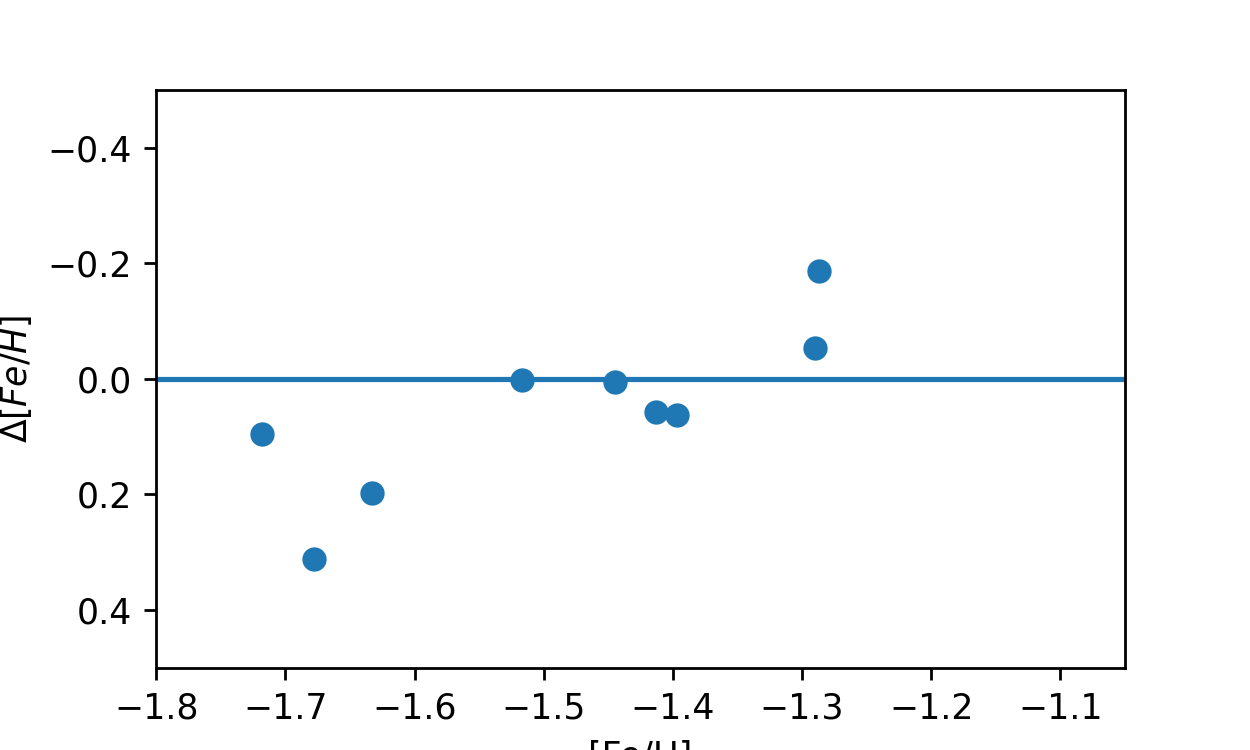

In [110]:
plt.figure(figsize=[5,3])
plt.plot([-2,0],[0,0])
plt.xlim([-1.8,-1.05])
plt.ylim([0.5,-0.5])
plt.ylabel(r'$\Delta [Fe/H]$')
plt.xlabel('[Fe/H]')
plt.scatter(x,x-y)